<h1>Simulating the action potential with random walk of ions</h1>

<h3>GroupXX: Us :p</h3>

<h2>Abstract</h2>

<h2>1 - Theory</h2>

**Teori**

<h2>2 - Excercises</h2>

**Excercises**

<h2>3 - Programming</h2>


In [2]:
'''Task 3 - programming'''

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.constants import Boltzmann as kb

N = 1000 # number of particles
steps = 100 # number of steps in the random walk simulation
particles = np.zeros(N) # vector containing the initial position (x=0) of all particles
h = 1 # length of a step taken by each particle per step/unit time delta t
T=1 # Temperature, arbitrarily defined, just a constant
beta_k = 0.1 # product of the two constants beta and k, relevant from task 5
beta = 1/(kb*T) # constant beta, kb is Boltzmanns constant and T is the temperature
k = beta_k/beta # exctract konstant k from beta*k

# This gives the probability threshold of which a particles travels right or left
# For task 3 (V = 0) Pm = 0.5
# Relevant from task 5 when v != 0
def P_min(x, V):
    V1 = V[steps+int(x)-h]
    V2 = V[steps+int(x)+h]
    rel_prob = np.exp(-beta_k*(V1 - V2))
    Pp = 1/(1 + rel_prob)
    Pm = 1 - Pp
    return Pm


'''
Simulates random walk
For each step it generates a step vector, containing the step direction of all particles at that step
and updates the position of each particle accordingly
'''
def rand_walk(p_pos, V):
    for j in range(steps):
        steps_vec = np.random.rand(N)
        for i in range(p_pos.size):
            if steps_vec[i] >= P_min(p_pos[i], V):
                steps_vec[i] = 1
            else:
                steps_vec[i] = -1
        p_pos += steps_vec
        params = norm.fit(p_pos)
    return p_pos, params

# Function for plotting the resulting distribution of particles
def plot_distribution(p_pos, V, V_name):
    p, params = rand_walk(p_pos, V)
    x_vec = np.arange(min(p), max(p))
    fitted_pdf = norm.pdf(x_vec, loc = params[0], scale = params[1])
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.hist(p, bins=50)
    ax2.plot(x_vec, fitted_pdf, color="r")
    plt.title(V_name)
    plt.show()

# zero potential
V0 = lambda x: 0
V0 = np.vectorize(V0)

V_vec = np.arange(-steps, steps+1)
V0_vec = V0(V_vec)

plot_distribution(particles, V0_vec, "V0")
particles = np.zeros(N)


<Figure size 640x480 with 2 Axes>

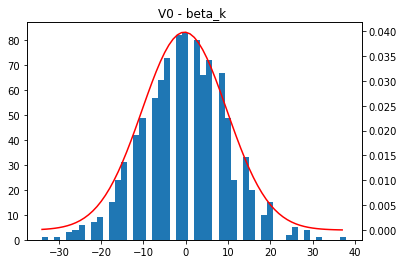

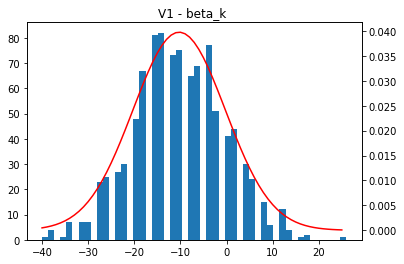

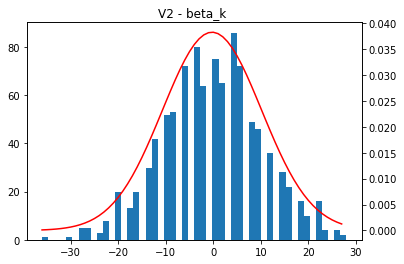

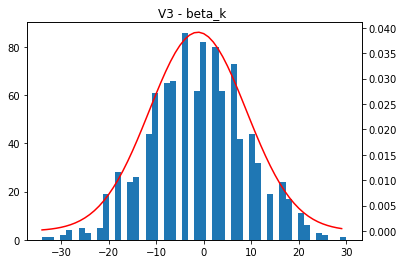

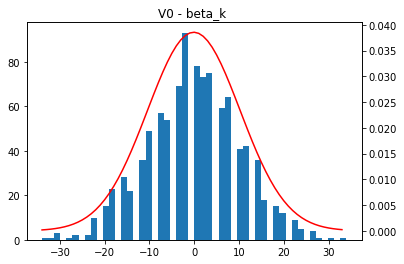

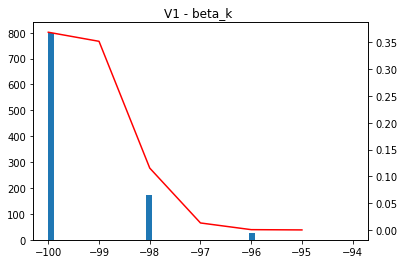

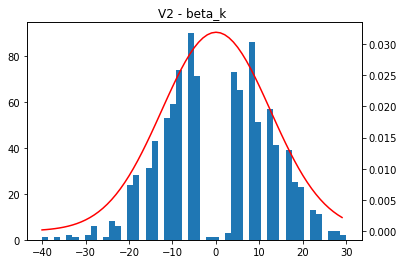

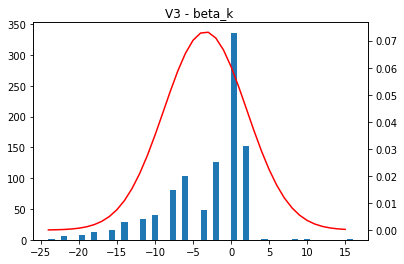

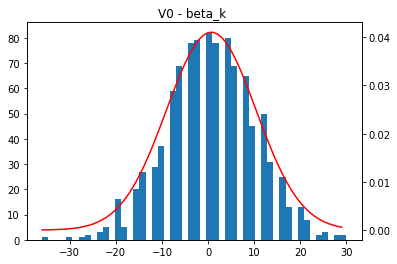

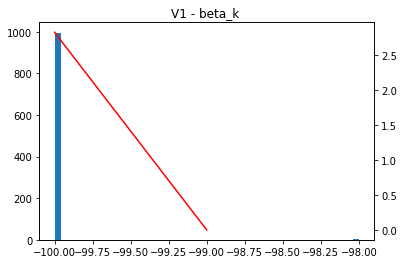

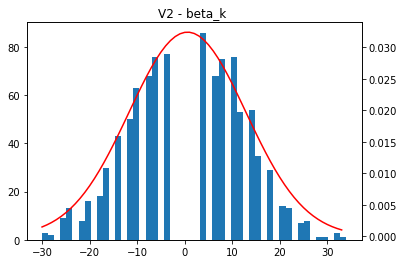

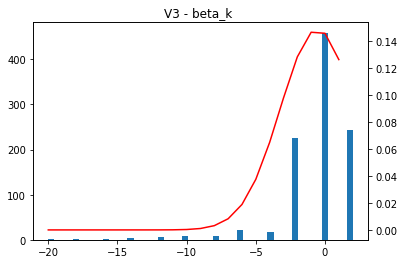

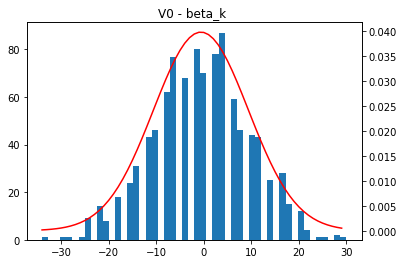

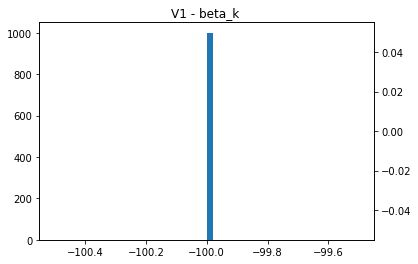

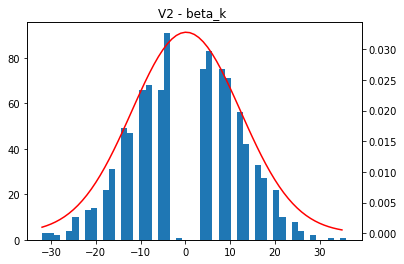

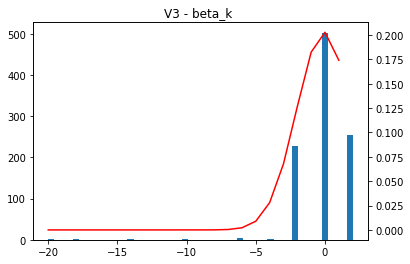

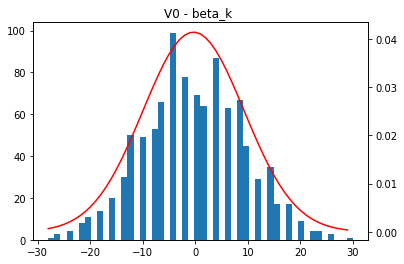

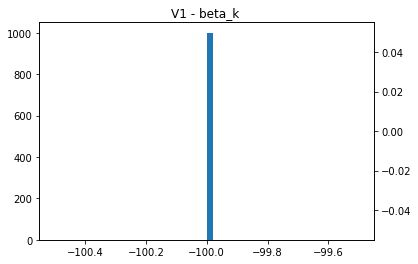

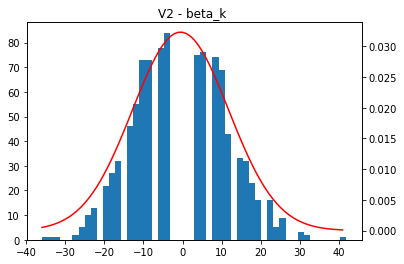

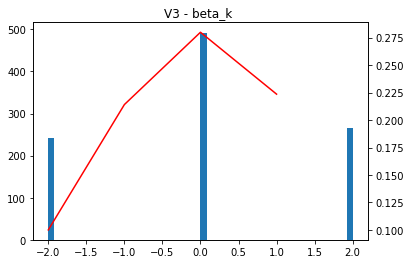

In [8]:
'''Task 5 - programming'''
# Potential exercise 5.1
V1 = lambda x: x


# Potential exercise 5.2
def V2(x):
    if -3*h < x and x < 3*h:
        return 1
    else:
        return 0
    
def V2_2(x):
    return np.where(\
                    np.logical_and(-3*h < x, x < 3*h),\
                    1,\
                    0)

# Potential exercise 5.3
def V3(x):
    if x < -3*h:
        return -1
    elif -3*h < x and x < 3*h:
        return (-1 + 2 * ((x + 3*h)/(6*h)))
    else:
        return 1
    
V1 = np.vectorize(V1)
V2 = np.vectorize(V2)
V3 = np.vectorize(V3)

V1_vec = V1(V_vec)
V2_vec = V2(V_vec)
V3_vec = V3(V_vec)

beta_k_list = [0.1, 3, 5, 7, 10]
for elem in beta_k_list:
    beta_k = elem
    stringV0 = "V0 - beta_k "
    stringV1 = "V1 - beta_k "
    stringV2 = "V2 - beta_k "
    stringV3 = "V3 - beta_k "
    plot_distribution(particles, V0_vec, stringV0)
    particles = np.zeros(N)
    plot_distribution(particles, V1_vec, stringV1)
    particles = np.zeros(N)
    plot_distribution(particles, V2_vec, stringV2)
    particles = np.zeros(N)
    plot_distribution(particles, V3_vec, stringV3)
    particles = np.zeros(N)

In [ ]:
N = 1000
steps = 100

beta_k = 10

V_vec = np.arange(-steps, steps+1)
V2_2_vec = V2_2(V_vec)

particles = np.zeros(N)
plot_distribution(particles, V2_2_vec, "V3")

In [ ]:
a = np.arange(-20, 30)
np.where(a < 3, a, a**2)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.constants import elementary_charge as elemc, Boltzmann as kb

h = 1 # step length
L = 50 # h. length of system
T = 273 + 37 # K, temperature
betaV0_Na = 0 # beta * V0_Na, beta = 1/kb*T, V0 some constant and kb = Boltzmanns constant
betaV0_K = 0 # beta * V0_K, beta = 1/kb*T, V0 some constant and kb = Boltzmanns constant
beta = 1/(kb*T)
Cc = 0.07*1e3 #CmMC/V
Qc_out = 150 #mM
C_p = 0.1 # mM
N_Na = 50+1450
N_K = 1400+50
Na_pos = np.array([-L//4]*50 + [L//4]*1450)
K_pos = np.array([-L//4]*1400 + [L//4]*50)
steps = 500
pos_vec = np.arange(-steps, steps+1)


# potentials

# time independent potential of the channels
def V_channel(x, V_0):
    if -h <= x and x <= h:
        return V_0
    else:
        return 0


V_channel = np.vectorize(V_channel)


# Time dependent potential
def V_elec(Na_pos, K_pos):
    Na_in = Na_pos[Na_pos < -h].size
    K_in = K_pos[K_pos < -h].size
    Qc_in = (Na_in + K_in)*C_p
    Qc = Qc_in - Qc_out
    return Qc/Cc #volts


# Linear potential and zero potential for testing
linpot = lambda x : x
linpot = np.vectorize(linpot)


def V0(Na_pos, K_pos):
    return 0


# Returns probability of a single particle stepping to the left
def P_min(x, V_vec):
    V1 = V_vec[steps + int(x) -h]
    V2 = V_vec[steps + int(x) +h]
    rel_prob = np.exp(-beta*(V1 - V2))
    Pp = 1/(1 + rel_prob)
    Pm = 1 - Pp
    return Pm


# Function looping through time and performing the simulation. Returns a vector with the
# time dependent potential values at each time step.
def rand_walk(Na_pos_vec, K_pos_vec, V_Na_vec, V_K_vec, p_vec, V_el_func, P_min_func):
    # array to store values of the time dependent potential
    Ve_vec = np.zeros(steps)

    # Loop over each time step
    for i in range(steps):
        # Calculate time dependent potential for the current timestep and store it in Ve_Vec
        Ve = V_el_func(Na_pos_vec, K_pos_vec)
        Ve_vec[i] = Ve

        # add Ve to the time independent potential vectors to get total potential
        V_Na_tot = V_Na_vec + np.heaviside(-p_vec, 0.5)*Ve*elemc
        V_K_tot = V_K_vec + np.heaviside(-p_vec, 0.5)*Ve*elemc

        # Generate vectors with 1 and -1 (vector containing the next step for each particle)
        steps_vec_Na = np.random.rand(Na_pos_vec.size) # vector with probabilities
        steps_vec_K = np.random.rand(K_pos_vec.size) # vector with probabilities
        # loop over all probabilities and determine if it should be a step to the right or left
        for j in range(steps_vec_Na.size):
            if steps_vec_Na[j] >= P_min_func(Na_pos_vec[j], V_Na_tot):
                steps_vec_Na[j] = 1
        for j in range(steps_vec_K.size):
            if steps_vec_K[j] >= P_min_func(K_pos_vec[j], V_K_tot):
                steps_vec_K[j] = 1
        # makes every step thats not a right step become a left step, maybe cleaner to use else statements for this
        steps_vec_Na[steps_vec_Na != 1] = -1
        steps_vec_K[steps_vec_K != 1] = -1

        # Have every particle take one step according to the step vector
        Na_pos_vec += steps_vec_Na.astype(int)
        K_pos_vec += steps_vec_K.astype(int)

        # boundaries at +- L/2, if a particle is on the boundary it has to move one step into the system
        Na_pos_vec[Na_pos_vec < -L/2] = -L/2 + 1
        Na_pos_vec[Na_pos_vec > L/2] = L/2 - 1
        K_pos_vec[K_pos_vec < -L/2] = -L/2 + 1
        K_pos_vec[K_pos_vec > L/2] = L/2 - 1
    return Ve_vec

# Plotting function
def plot_dist(Na_pos_vec, K_pos_vec, V_Na_vec, V_k_vec, p_vec, V_el_func, P_min_func, t_vec, V_name="hm"):
    Ve_vec = rand_walk(Na_pos_vec, K_pos_vec, V_Na_vec, V_k_vec, p_vec,  V_el_func, P_min_func)

    plt.hist(Na_pos_vec, bins="auto")
    plt.show()
    plt.hist(K_pos_vec, bins="auto")
    plt.show()
    plt.plot(t_vec, Ve_vec)
    plt.show()


# Function for plotting the resulting distribution of particles
'''def plot_distribution_7(Na_pos, K_pos, V_name):
    pNa, pK, params_Na, params_K, V_Na, V_K, Ve_vec = rand_walk_7(Na_pos, K_pos, V_Nac, V_Kc, V_elec)
    
    print(pNa[pNa < -h].size)
    print(pK[pK < -h].size)
    
    x_vec_Na = np.arange(min(pNa), max(pNa))
    x_vec_K = np.arange(min(pK), max(pK))
    fitted_pdf_Na = norm.pdf(x_vec_Na, loc = params_Na[0], scale = params_Na[1])
    fitted_pdf_K = norm.pdf(x_vec_K, loc = params_K[0], scale = params_K[1])
    
    fig1, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.hist(pNa, bins="auto")
    ax2.plot(x_vec_Na, fitted_pdf_Na, color="r")
    plt.title("Na")
    
    fig2, ax3 = plt.subplots()
    ax4 = ax3.twinx()
    ax3.hist(pK, bins="auto")
    ax4.plot(x_vec_K, fitted_pdf_K, color="r")
    plt.title("K")
    plt.show()
    
    fig3 = plt.figure("fig3")
    plt.plot(t_vec, Ve_vec)
    '''


In [ ]:
betaV0 = 0

V_Nac = V_channel(pos_vec, betaV0/beta)
V_Kc = V_channel(pos_vec, betaV0/beta)
t_vec = np.arange(steps)

V_Nac = V_channel(pos_vec, betaV0/beta)
V_Kc = V_channel(pos_vec, betaV0/beta)   
plot_distribution_7(Na_pos, K_pos, "heh")
Na_pos = np.array([int(L/4)]*1450 + [int(-L/4)]*50)
K_pos = np.array([int(L/4)]*50 + [int(-L/4)]*1400)


In [ ]:
'''7.2'''

betaV0_Na = 1
betaV0_K = 10

V_Nac = V_channel(pos_vec, betaV0_Na/beta)
V_Kc = V_channel(pos_vec, betaV0_K/beta)
t_vec = np.arange(steps)

plot_distribution_7(Na_pos, K_pos, "heh")
Na_pos = np.array([int(L/4)]*1450 + [int(-L/4)]*50)
K_pos = np.array([int(L/4)]*50 + [int(-L/4)]*1400)


In [ ]:
'''also 7.2'''
betaV0_Na = 10
betaV0_K = 1

V_Nac = V_channel(pos_vec, betaV0_Na/beta)
V_Kc = V_channel(pos_vec, betaV0_K/beta)
t_vec = np.arange(steps)

plot_distribution_7(Na_pos, K_pos, "heh")
Na_pos = np.array([int(L/4)]*1450 + [int(-L/4)]*50)
K_pos = np.array([int(L/4)]*50 + [int(-L/4)]*1400)

## Vi må svare bra på spm om hvorfor V(t) slår seg "til ro" ved ulikt nivå i 7.1 og 7.2. (som de forsåvidt ikke gjør i våre plot nå da :pp) 

In [11]:
import numpy as np

a = np.array([0,4,2,9,5,4])
print(a)
b = np.argwhere(a>4)
print(b)

[0 4 2 9 5 4]
[[3]
 [4]]
